In [55]:
import pandas as pd
import missingno as msno

file_path='C:/data/WorldCups-ActionLearning2.csv' #파일 불러오기

df=pd.read_csv(file_path)#파일 읽고 저장
df

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,ExpectedScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70.0,80.0,13.0,18.0,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70.0,90.0,16.0,17.0,363.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84.0,70.0,15.0,18.0,3757.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88.0,90.0,13.0,22.0,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140.0,117.0,16.0,26.0,768607.0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126.0,160.0,NaN,35.0,81981.0
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89.0,90.0,16.0,32.0,893172.0
7,1966,England,England,Germany FR,Portugal,Soviet Union,89.0,199.0,16.0,NaN,1563135.0
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,NaN,NaN,16.0,32.0,1603975.0
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97.0,110.0,16.0,38.0,1865753.0


<AxesSubplot:>

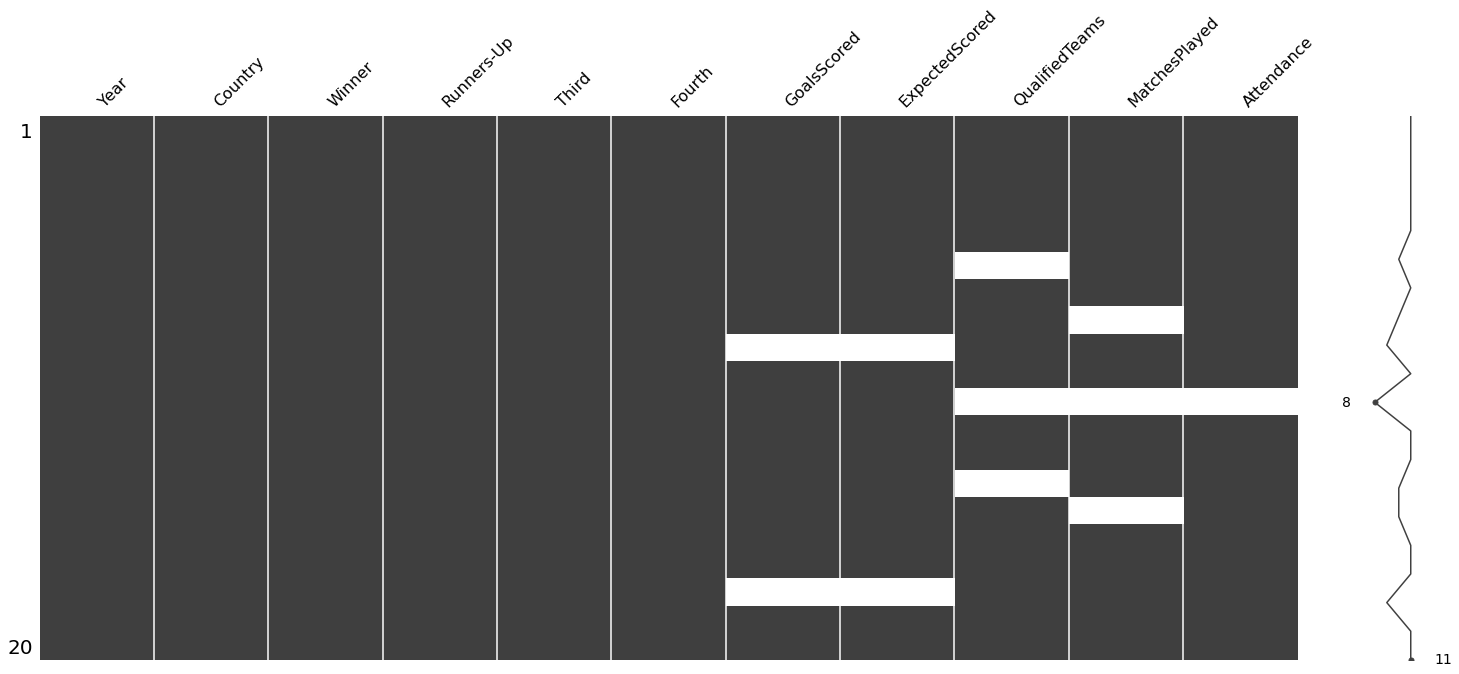

In [56]:
msno.matrix(df) #매트릭스 결측치 시각화

<AxesSubplot:>

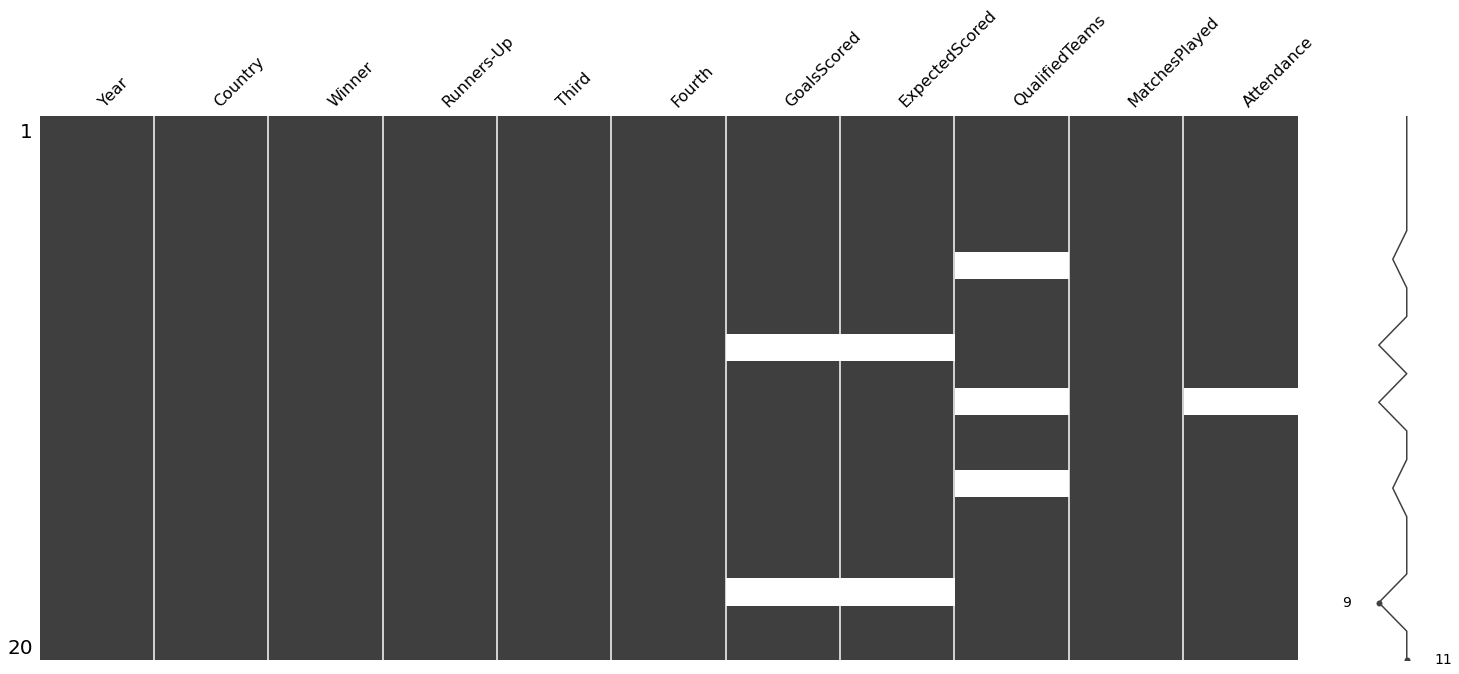

In [58]:
df['MatchesPlayed'].fillna(df['MatchesPlayed'].mean(), inplace=True)
#MatchesPlayed의 평균을 mean()로 구한 뒤 fillna를 이용하여 평균값으로 대체한다
msno.matrix(df) #결측치 시각화

In [59]:
import numpy
from scipy import stats

#리스트에 있는 값이 평균인 40와 비교를 했을 때 평균과 차이가 없을 경우 귀무 가설
#차이가 있을 경우 대립가설을 증명한다.
tTestResult=stats.ttest_1samp(df.MatchesPlayed, 40)
tTestResult #결과 출력

print('t검정 통계량 = %.3f, pvalue=%.3f'%(tTestResult))

t검정 통계량 = 0.530, pvalue=0.602


In [60]:
#A와 B의 데이터를 작성한다.
A = numpy.array([88, 63, 71, 72, 81, 61, 69, 73, 77, 82, 85, 64, 79, 80, 68])
B = numpy.array([51, 66, 74, 74, 79, 69, 59, 54, 81, 63, 62, 56, 60, 76, 65])

tTestResult=stats.ttest_rel(A, B) #A와 B의 데이터의 평균 차이를 비교한다.
tTestResult #결과 출력
print('t검정 통계량 = %.3f, pvalue=%.3f'%(tTestResult))

t검정 통계량 = 2.525, pvalue=0.024


<AxesSubplot:>

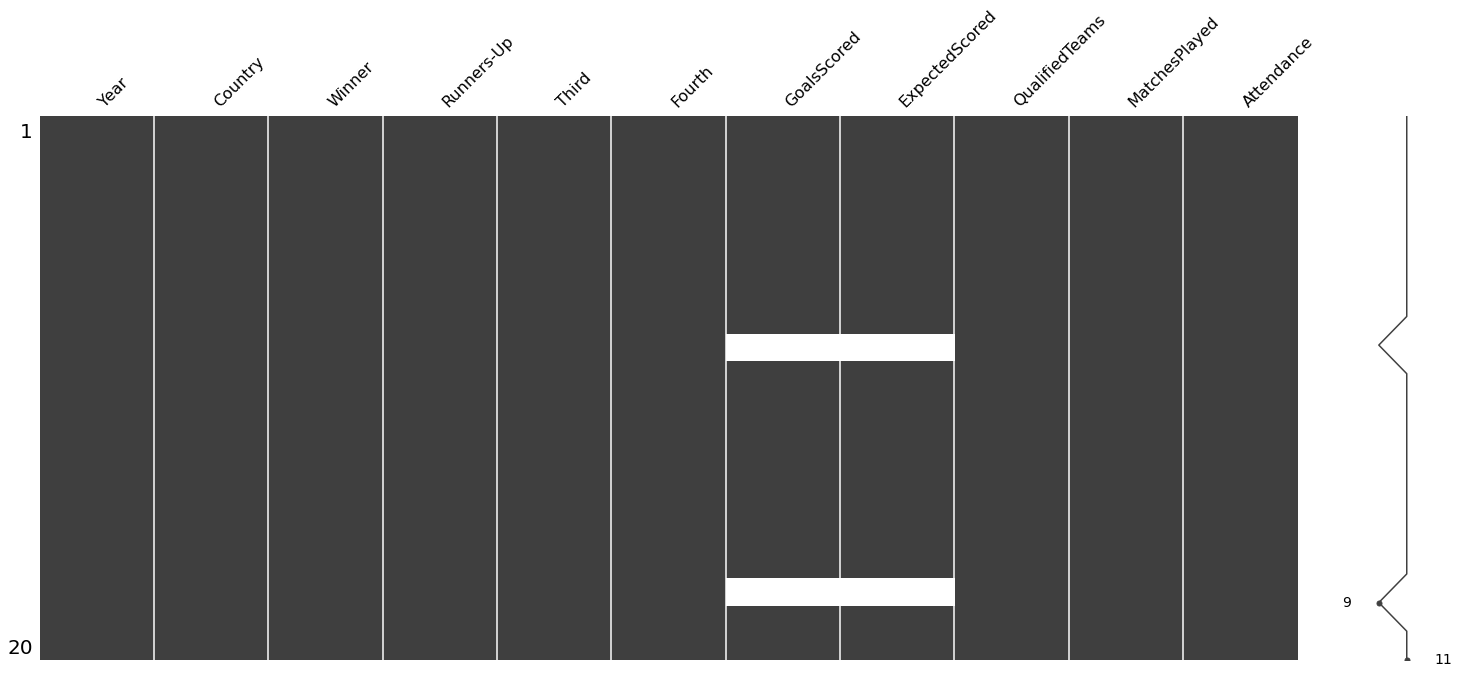

In [62]:
#QualifiedTeamssms ffill로 앞의 값으로 대체한다.
df['QualifiedTeams'].fillna(method='ffill', inplace=True)
#Attendance는 bfill로 뒤의 값으로 대체한다.
df['Attendance'].fillna(method='bfill', inplace=True)
msno.matrix(df)

In [63]:
#QualifiedTeams와 Attendance을 비교한다.
tTestResult=stats.ttest_rel(df.QualifiedTeams,df.Attendance)
tTestResult #결과 출력

Ttest_relResult(statistic=-6.944674510887194, pvalue=1.2809995875170753e-06)

<AxesSubplot:>

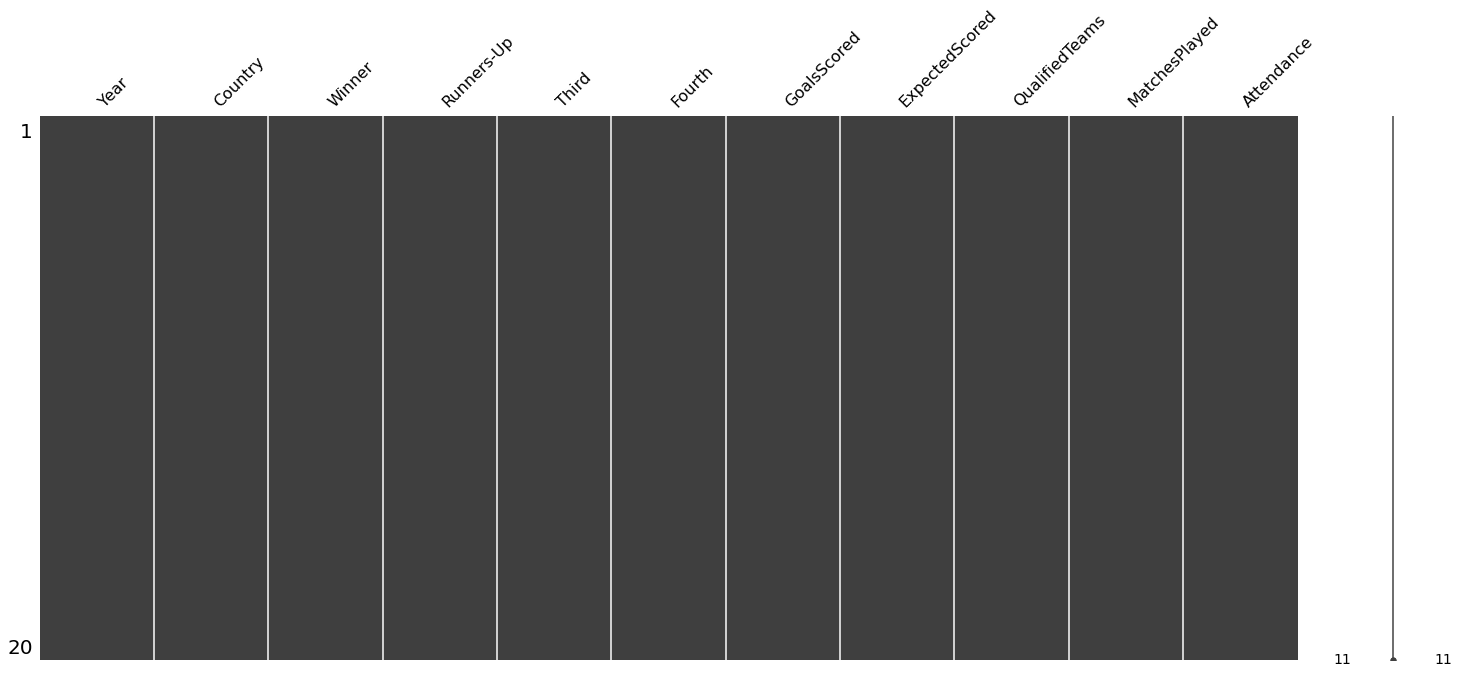

In [65]:
#GoalsScored을 50으로 대체한다.
df['GoalsScored'].fillna(50, inplace=True)
#ExpectedScored를 50으로 대체한다.
df['ExpectedScored'].fillna(50, inplace=True)
msno.matrix(df)

In [76]:
from pandas import DataFrame
dataf=DataFrame([df.GoalsScored, df.ExpectedScored]) #데이터프레임으로 만들기
dataf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
GoalsScored,70.0,70.0,84.0,88.0,140.0,126.0,89.0,89.0,50.0,97.0,102.0,146.0,132.0,115.0,141.0,171.0,161.0,50.0,145.0,171.0
ExpectedScored,80.0,90.0,70.0,90.0,117.0,160.0,90.0,199.0,50.0,110.0,150.0,120.0,90.0,80.0,160.0,100.0,160.0,50.0,140.0,131.0
